In [1]:
from gurobipy import *
import math
import copy
import matplotlib.pyplot as plt

In [2]:
p = {
0:[5,32],
1: [11,50],
2: [31,9],
3: [5, 2],
4 :[47, 11],
5: [25, 37],
6: [50,30],
}
tar = [0, 0]

In [3]:
def max(list):
    max_x = 0
    ind_x = -1
    max_y = 0
    ind_y = -1
    for i in list:
        if p[i][0] > max_x:
            max_x = p[i][0]
            ind_x = i
        if p[i][1] > max_y:
            max_y = p[i][1]
            ind_y = i
    return ind_x, ind_y
# print(max(p))

In [4]:
model = Model("Point")
x = model.addVar(vtype = GRB.CONTINUOUS, name = 'x')
x_2 = model.addVar(vtype = GRB.CONTINUOUS, name = 'x2')
y = model.addVar(vtype = GRB.CONTINUOUS, name = 'y')
y_2 = model.addVar(vtype = GRB.CONTINUOUS, name = 'y2')
dis = {}
m = {}
disToTar = {}
for i in p:
    disToTar[i] = pow(tar[0]-p[i][0],2) + pow(tar[1]-p[i][1],2)
for i in range(len(p)+1):
    dis[i] = model.addVar(vtype = GRB.CONTINUOUS, name = 'dis{}'.format(i))
    for j in range(2):
        m[i,j] = model.addVar(vtype = GRB.BINARY, name = 'm{},{}'.format(i,j))
ind_x, ind_y = max(p)
model.addConstr(p[ind_x][0] >= x, name = '(x)')
model.addConstr(p[ind_y][1] >= y, name = '(y)')
model.addConstr(tar[0] <= x, name = '(x)')
model.addConstr(tar[1] <= y, name = '(y)')

count = 0
model.addGenConstrPow( x, x_2, 2.0, name = "x2")
model.addGenConstrPow( y, y_2, 2.0, name = "y2")
for i in p:
    disToP = m[int(i),0]*(x_2+y_2)-m[int(i),0]*2*(x*p[i][0] + y*p[i][1])+ m[int(i),0]*(pow(p[i][0],2)+ pow(p[i][1],2))
    model.addConstr(dis[int(i)] == disToP + m[int(i),1]*disToTar[i], name = "(dis)")
model.addConstr(dis[len(p)] >= pow(x-tar[0],2) + pow(y-tar[1],2), name = "(dis)")

for i in p:
    model.addConstr(m[i,0] + m[i,1] == 1, name = '(type)')
    
    
lhs_t = LinExpr(quicksum(dis[i] for i in range(len(p)+1)))
model.setObjective(lhs_t,GRB.MINIMIZE)
model.params.NonConvex = 2
model.update()
model.display()
model.optimize()
print("Optimize value = ", model.ObjVal)


Academic license - for non-commercial use only - expires 2021-10-27
Using license file C:\Users\linda\gurobi.lic
Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Minimize
   <gurobi.LinExpr: dis0 + dis1 + dis2 + dis3 + dis4 + dis5 + dis6 + dis7>
Subject To
   (x) : <gurobi.LinExpr: x> <= 50.0
   (y) : <gurobi.LinExpr: y> <= 50.0
   (x) : <gurobi.LinExpr: x> >= 0.0
   (y) : <gurobi.LinExpr: y> >= 0.0
   (type) : <gurobi.LinExpr: m0,0 + m0,1> = 1.0
   (type) : <gurobi.LinExpr: m1,0 + m1,1> = 1.0
   (type) : <gurobi.LinExpr: m2,0 + m2,1> = 1.0
   (type) : <gurobi.LinExpr: m3,0 + m3,1> = 1.0
   (type) : <gurobi.LinExpr: m4,0 + m4,1> = 1.0
   (type) : <gurobi.LinExpr: m5,0 + m5,1> = 1.0
   (type) : <gurobi.LinExpr: m6,0 + m6,1> = 1.0
   (dis) : <gurobi.QuadExpr: dis0 + -1049.0 m0,0 + -1049.0 m0,1 + [ 10.0 x * m0,0 + -1.0 x2 * m0,0 + 64.0 y * m0,0 + -1.0 y2 * m0,0 ]> >= 0.0
   (dis) : <gurobi.QuadExpr: dis1 + -2621.0 m1,0 + -2621.0 m1,1 + [ 22.0 x * m1,0 + 

In [5]:
for var in model.getVars(): 
    if(var.varName == 'x' or var.varName == 'y'):
        print('{name} : {val}'.format(name=var.varName, val = var.x))
    if(var.varName[0] == 'm' and var.x > 0):
        print('{name} : {val}'.format(name=var.varName, val = var.x))

x : 24.16666618077517
y : 24.166665217065784
m0,0 : 1.0
m1,0 : 1.0
m2,0 : 1.0
m3,1 : 1.0
m4,0 : 1.0
m5,0 : 1.0
m6,0 : 1.0


In [3]:
# 微分，f'(x)，當前需手算

def diffx_2(x, y,p):
    return pow(y-p[0][1],2)/(pow(x-p[0][0],2)+pow(y-p[0][1],2))*math.sqrt(pow(x-p[0][0],2)+pow(y-p[0][1],2)) + pow(y-p[1][1],2)/(pow(x-p[1][0],2)+pow(y-p[1][1],2))*math.sqrt(pow(x-p[1][0],2)+pow(y-p[1][1],2)) + pow(y-p[2][1],2)/(pow(x-p[2][0],2)+pow(y-p[2][1],2))*math.sqrt(pow(x-p[2][0],2)+pow(y-p[2][1],2))

def diffy_2(x, y,p):
    return pow(x-p[0][0],2)/(pow(x-p[0][0],2)+pow(y-p[0][1],2))*math.sqrt(pow(x-p[0][0],2)+pow(y-p[0][1],2)) + pow(x-p[1][0],2)/(pow(x-p[1][0],2)+pow(y-p[1][1],2))*math.sqrt(pow(x-p[1][0],2)+pow(y-p[1][1],2)) + pow(x-p[2][0],2)/(pow(x-p[2][0],2)+pow(y-p[2][1],2))*math.sqrt(pow(x-p[2][0],2)+pow(y-p[2][1],2))

def diffx(x, y,p):
    return pow(math.sqrt(pow(x-p[0][0], 2) + pow(y-p[0][1],2)),-1/2)*2*(x-p[0][0]) + pow(math.sqrt(pow(x-p[1][0], 2) + pow(y-p[1][1],2)),-1/2)*2*(x-p[1][0])+pow(math.sqrt(pow(x-p[2][0], 2) + pow(y-p[2][1],2)),-1/2)*2*(x-p[2][0])

def diffy(x, y,p):
    return pow(math.sqrt(pow(x-p[0][0], 2) + pow(y-p[0][1],2)),-1/2)*2*(y-p[0][1]) + pow(math.sqrt(pow(x-p[1][0], 2) + pow(y-p[1][1],2)),-1/2)*2*(y-p[1][1])+pow(math.sqrt(pow(x-p[2][0], 2) + pow(y-p[2][1],2)),-1/2)*2*(y-p[2][1])

# y=f(x)
def f(x, y, p):
    return math.sqrt(pow(x-p[0][0], 2) + pow(y-p[0][1],2)) + math.sqrt(pow(x-p[1][0], 2) + pow(y-p[1][1],2)) + math.sqrt(pow(x-p[2][0], 2) + pow(y-p[2][1],2))

def Newton(f, p,diffx, ini_valx = 1, ini_valy = 1, err=10**-13, maxiter = 1000, prt_step = False):
    x = ini_valx 
    y = ini_valy
    for i in range(maxiter):
        x -= diffx(x,y,p)/diffx_2(x,y,p)
        y -= diffx(x,y,p)/diffy_2(x,y,p)
        if prt_step == True:
            print(f"After {i+1} iteration, the solution is updated to {x}, f(x) is {f(x)}")
#         print(abs(f(x,y)))
        if abs(diffx(x,y,p))<err:
            break
    return x, y
    
def Binary(f, leftx, rightx, lefty, righty ,p,err=10**-13, maxiter = 100, prt_step = False):
    for i in range(maxiter):
        middlex = (leftx+rightx)/2
        middley = (lefty+righty)/2
        if prt_step == True:
            print(f"After {i+1} iteration, the solution is updated to {middle}, f(x) is {f(middle)}")
        if abs(diffx(middlex, middley,p))<err:
            break
        if diffx(leftx, lefty,p)*diffx(middlex, middley,p)<=0:
            rightx=middlex
            righty=middley
        else:
            leftx=middlex
            lefty=middley
    return middlex, middley

def solve(p):
    func = lambda x, y :f(x,y,p)
    ini_valx_l = (p[0][0] + p[1][0]) / 2
    ini_valy_l = (p[0][1] + p[1][1]) / 2
    ini_valx_r = (p[1][0] + p[2][0]) / 2
    ini_valy_r = (p[1][1] + p[2][1]) / 2
    x, y = Binary(func, 10, 1- 10 ** -11, 10, 1- 10 ** -11,p ,err=10**-2)
    return Newton(func, p,diffx, ini_valx = x, ini_valy = y)

def simple(x):
    return math.floor(x*100)/100
def orgDis(p, tar):
    dis = 0
    for i in range(len(p)):
        dis += math.sqrt(pow(p[i][0] - tar[0], 2) + pow(p[i][1] - tar[1], 2))
    return dis

In [4]:
def generate_path(p, tar):
    n_p = copy.deepcopy(p)
    length = len(n_p)
    curr_p = {2:[tar[0], tar[1]]}
    done_node = []
    path = {}
    # init
    for i in range(len(n_p)):
        path[i] = [i]
    flag = True
    count = 0
    while(len(done_node) < len(n_p)):
        count += 1
        #各點在此迴圈可做的選擇         
        choice = {}
        flag = False
        for i in range(0,len(n_p)):
            for j in range(i+1,len(n_p)):
                if(i not in done_node and j not in done_node):
                    curr_p[0] = n_p[i]
                    curr_p[1] = n_p[j]
                    x,y = solve(curr_p)
                    x = simple(x)
                    y = simple(y)
                    midDis = simple(f(x,y,curr_p))
                    directDis = simple(orgDis({0:curr_p[0],1:curr_p[1]}, curr_p[2]))
                    if(midDis < directDis):
                        #產生中繼點
                        if (x,y,i,j) not in choice:
                            choice[x,y,i,j] = simple(directDis-midDis)
                        flag = True
        choice = {k: v for k, v in sorted(choice.items(), key=lambda item: item[1], reverse = True)}
        #每個點做選擇
#         print(choice)
#         for key, value in choice.items():
#             #update
#             if(key[2] not in done_node and key[3] not in done_node):
#                 index = -1
#                 if [key[0], key[1]] not in n_p.values():
#                     n_p[len(n_p)] = [key[0], key[1]]
#                     index = len(n_p) - 1
#                 else:
#                     index = list(n_p.keys())[list(n_p.values()).index([key[0], key[1]])]
#                 for k in range(len(path)):
#                     if key[2] == path[k][len(path[k])-1] or key[3] == path[k][len(path[k])-1]:
#                         path[k].append(index)
#                         if key[2] not in done_node:
#                             done_node.append(key[2])
#                         if key[3] not in done_node:
#                             done_node.append(key[3])
        if(len(choice) > 0):
            key = list(choice.keys())[0]
            if(key[2] not in done_node and key[3] not in done_node):
                index = -1
                if [key[0], key[1]] not in n_p.values():
                    n_p[len(n_p)] = [key[0], key[1]]
                    index = len(n_p) - 1
                else:
                    index = list(n_p.keys())[list(n_p.values()).index([key[0], key[1]])]
                for k in range(len(path)):
                    if key[2] == path[k][len(path[k])-1] or key[3] == path[k][len(path[k])-1]:
                        path[k].append(index)
                        if key[2] not in done_node:
                            done_node.append(key[2])
                        if key[3] not in done_node:
                            done_node.append(key[3])
                    
        if not flag:
            for i in range(len(path)):
                path[i].append('end')
                done_node.append(i)
    return path, n_p


In [5]:
path, n_p = generate_path(p, tar)
print(path)
print(n_p)

{0: [0, 10, 11, 'end'], 1: [1, 8, 'end'], 2: [2, 9, 10, 11, 'end'], 3: [3, 11, 'end'], 4: [4, 7, 9, 10, 11, 'end'], 5: [5, 8, 'end'], 6: [6, 7, 9, 10, 11, 'end']}
{0: [5, 32], 1: [11, 50], 2: [31, 9], 3: [5, 2], 4: [47, 11], 5: [25, 37], 6: [50, 30], 7: [36.65, 10.18], 8: [13.68, 44.33], 9: [25.57, 3.5], 10: [10.09, 12.8], 11: [4.78, 4.78]}


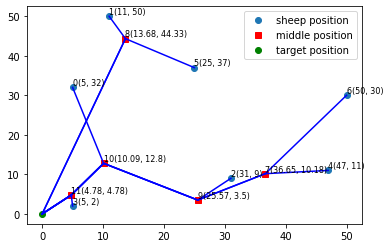

In [6]:


# 繪圖用
mid_p = []
fin_p = []
for i in range(len(p)):
    fin_p.append((p[i][0], p[i][1]))

testx, testy = zip(*fin_p)
plt.plot(testx, testy, 'o', label = 'sheep position')
for i in range(len(p), len(n_p)):
    mid_p.append((n_p[i][0], n_p[i][1]))
    fin_p.append((n_p[i][0], n_p[i][1]))
fin_p.append((0,0))
annotations=[]
for i in range(len(n_p)):
    annotations.append(str(i)+'(' + str(n_p[i][0]) + ', ' + str(n_p[i][1]) + ')')
#     annotations.append(str(i))
testx, testy = zip(*mid_p)
plt.plot(testx, testy, 'sr', label = 'middle position')
plt.plot(0,0, 'og', label = 'target position')
for k in range(len(path)):
    for i in range(len(path[k]) - 1):  # plot each connections
        if(path[k][i+1] == 'end'):
            x, y = zip(fin_p[path[k][i]], fin_p[len(fin_p)-1])
        else:
            x, y = zip(fin_p[path[k][i]], fin_p[path[k][i+1]])
        plt.plot(x, y, 'b')
for i, label in enumerate(annotations):
    plt.text(fin_p[i][0], fin_p[i][1],label, size = 8, weight = 'light', ha= 'left',va='bottom', wrap = False)
# plt.axis([0,10,0,10])
plt.legend()
plt.show()

In [10]:
def clearFile(filename):
    open(filename, 'w').close()

In [6]:
dis = {}
for i in path:
    for j in range(len(path[i])-1):
        if path[i][j+1] == 'end':
            dis[path[i][j]] = simple(math.sqrt(pow(n_p[path[i][j]][0] - tar[0], 2) + pow(n_p[path[i][j]][1] - tar[1], 2)))
        else:
            dis[path[i][j]] = simple(math.sqrt(pow(n_p[path[i][j]][0] - n_p[path[i][j+1]][0], 2) + pow(n_p[path[i][j]][1] - n_p[path[i][j+1]][1], 2)))


In [35]:
filename = 'input_point.txt'
f = open(filename, "a")
clearFile(filename)
f.write('n\t' + str(len(n_p)) + '\n')
f.write('m\t' + str(len(p)) + '\n')
f.write('s\t' + str(tar[0]) + '\t' + str(tar[1]) + '\n')
for i in n_p:
    f.write('d\t' + str(i) + '\t' + str(n_p[i][0]) + '\t' + str(n_p[i][1]) + '\t' + str(dis[i]) + '\n')
for i in path:
    f.write('p')
    for j in path[i]:
        if j == 'end':
            f.write('\t-1')
        else:
            f.write('\t' + str(j))
    f.write('\n')
        
        
f.write('e')
f.close()

In [10]:
def totalDis(lists, dis): 
    t = 0 
    for i in lists: 
        if i != 'end': 
            t += dis[i] 
    return t

def maxDis(lists,dis): 
    ind = -1
    maxi = 0 
    for i in lists: 
        if dis[i] > maxi:
            maxi = dis[i]
            ind = i 
    return ind 
def minimum(lists):
    ind = -1
    mini = 99999
    for i in lists:
        if lists[i] < mini:
            mini = lists[i] 
            ind = i 
    return ind

def totalDis(lists, dis):
    t = 0
    for i in lists:
        if i != 'end':
            t += dis[i]
    return t

def maxDis(lists,dis):
    ind = -1
    maxi = 0
    for i in lists:
        if dis[i] > maxi:
            maxi = dis[i]
            ind = i
    return ind
def minimum(lists):
    ind = -1
    mini = 99999
    for i in lists:
        if lists[i] < mini:
            mini = lists[i]
            ind = i
    return ind

In [93]:
V = 3
jun = {}
totalD = {}
# 兩台車分配
c1 = []
c2 = []
edges = {}
for i in path:
    totalD[i] = totalDis(path[i], dis)
    for j in range(len(path[i])-1):
        if path[i][j] not in edges:
#             print(path[i][j], dis[0])
            edges[path[i][j]] = (path[i][j], path[i][j+1])
        if path[i][j+1] == 'end' or path[i][j+1] > len(p)-1:
            totalD[path[i][j+1]] = totalDis(path[i][j+1:], dis)
            if path[i][j+1] not in jun:
                jun[path[i][j+1]] = [path[i][j]]
            elif path[i][j] not in jun[path[i][j+1]]:
                jun[path[i][j+1]].append(path[i][j])
# print(edges)
t = {} #edge i 結束的時間
curr_t = 0
D = 3
c_t = {}
c_path = {}
for i in range(1, D+1):
    c_t[i] = 0
    c_path[i] = []
done = []
undone = []
processing = []
for i in range(0,len(p)):
    undone.append(i)
while(len(undone) > 0 or len(processing) > 0):
    if maxDis(undone, totalD) == -1:
        x = {k: v for k, v in sorted(c_t.items(), key=lambda item: item[1])}
        curr = 1
        while(curr_t >= list(x.values())[curr]):
            curr += 1
        curr_t = list(x.values())[curr]
        for i in c_t:
            if c_t[i] < curr_t:
                c_path[i].append('waiting ' + str(curr_t - c_t[i]) + ' s')
#                 c_t[i] = curr_t
    elif len(undone) > 0:
        index = maxDis(undone, totalD)
        c_ind = minimum(c_t)
        print('Drone ' + str(c_ind) + ' takes edge ' + str(edges[index]) + ', current time: ' + str(curr_t))
        c_path[c_ind].append(edges[index])
        t[index] = simple((dis[index]/V)) + curr_t
        undone.remove(index)
        processing.append(index)
        c_t[c_ind] = t[index]
        curr_t = c_t[minimum(c_t)]
    for i in range(len(n_p)):
        if i in t and (i not in done and i in processing) and t[i] <= curr_t:
            processing.remove(i)
            done.append(i)
    #check middle points
    for i in range(len(p), len(n_p)):
        if i not in done and i not in undone and i not in processing:
            flag = False
            for j in jun[i]:
                if j not in done:
                    flag = True
            if not flag:
                undone.append(i)

                
t_window = {}
for i in c_path:
    t_window[i] = [0]
    print('\nDrone ' + str(i) + ' : \n')
    print(c_path[i])
    for j in c_path[i]:
        if j[0] == 'w':
            t_window[i].append(t_window[i][-1] + float(j.split(' ', 3)[1]))
        else:
            t_window[i].append(t_window[i][-1] + simple((dis[j[0]]/V)))
#     print(t_window[i][1:])
            
print('\n\ntotal time: ' + str(curr_t) + ' s')

Drone 1 takes edge (6, 7), current time: 0
Drone 2 takes edge (5, 8), current time: 0
Drone 3 takes edge (4, 7), current time: 0
Drone 3 takes edge (1, 8), current time: 3.46
Drone 2 takes edge (2, 9), current time: 4.49
Drone 3 takes edge (8, 'end'), current time: 5.55
Drone 2 takes edge (0, 10), current time: 7.0600000000000005
Drone 1 takes edge (7, 9), current time: 7.96
Drone 1 takes edge (9, 10), current time: 12.26
Drone 2 takes edge (3, 11), current time: 13.68
Drone 2 takes edge (10, 11), current time: 18.27
Drone 1 takes edge (11, 'end'), current time: 21.47

Drone 1 : 

[(6, 7), (7, 9), (9, 10), 'waiting 2.740000000000002 s', 'waiting 3.1999999999999993 s', (11, 'end')]

Drone 2 : 

[(5, 8), (2, 9), (0, 10), (3, 11), 'waiting 3.67 s', (10, 11), 'waiting 2.25 s']

Drone 3 : 

[(4, 7), (1, 8), (8, 'end'), 'waiting 0.4599999999999973 s', 'waiting 0.4599999999999973 s', 'waiting 2.7099999999999973 s']


total time: 23.72 s
